In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
origin_data = pd.read_csv('winemag-data-130k-v2.csv/winemag-data-130k-v2.csv')

In [3]:
origin_data.shape

(129971, 14)

In [4]:
origin_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


In [6]:
origin_data['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Czech Re

In [7]:
data=origin_data.dropna(axis=0,subset=['price'])

In [8]:
data.columns[0]

'Unnamed: 0'

In [9]:
data=data.drop(data.columns[0],axis=1)

In [10]:
data.shape

(120975, 13)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120975 entries, 1 to 129970
Data columns (total 13 columns):
country                  120916 non-null object
description              120975 non-null object
designation              86196 non-null object
points                   120975 non-null int64
price                    120975 non-null float64
province                 120916 non-null object
region_1                 101400 non-null object
region_2                 50292 non-null object
taster_name              96479 non-null object
taster_twitter_handle    91559 non-null object
title                    120975 non-null object
variety                  120974 non-null object
winery                   120975 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [12]:
ncol=[]
ncol.append(data.columns)
ncol.append([data[col].nunique() for col in data.columns])
ncol=pd.DataFrame(np.asarray(ncol))
ncol

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,42,111567,35776,21,390,422,1204,17,19,15,110638,697,15855


In [13]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
#missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
0,country,59
1,description,0
2,designation,34779
3,points,0
4,price,0
5,province,59
6,region_1,19575
7,region_2,70683
8,taster_name,24496
9,taster_twitter_handle,29416


In [14]:
data[data['country'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
11150,NaN,"A blend of 85% Melnik, 10% Grenache Noir and 5...",NaN,89,20.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2013 Melnik,Melnik,Orbelus
14030,NaN,"This Furmint, grown in marl soils, has aromas ...",Márga,88,25.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,St. Donat 2013 Márga White,White Blend,St. Donat
16000,NaN,"Jumpy, jammy aromas of foxy black fruits are s...",Valle de los Manantiales Vineyard,86,40.0,NaN,NaN,NaN,Michael Schachner,@wineschach,Familia Deicas 2015 Valle de los Manantiales V...,Tannat,Familia Deicas
18075,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Askitikos Assyrtiko,Assyrtiko,Tsililis
26485,NaN,"This wine has aromas of black berry, dried red...",NaN,87,13.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2013 Shiraz,Shiraz,Stone Castle
26486,NaN,Aromas of green apple and white flowers prepar...,NaN,87,14.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Teliani Valley 2015 Tsolikouri,Tsolikouri,Teliani Valley


In [15]:
data[data['country']=='Georgia']

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4048,Georgia,"Deep ruby in the glass, this wine offers a bou...",Mukuzani,88,12.0,Kakheti,NaN,NaN,Mike DeSimone,@worldwineguys,Wine Man 2014 Mukuzani Saperavi (Kakheti),Saperavi,Wine Man
5416,Georgia,"Medium-gold to the eye, this wine has an inter...",Premium,88,20.0,Kakheti,NaN,NaN,Mike DeSimone,@worldwineguys,Danieli 2014 Premium Kisi (Kakheti),Kisi,Danieli
11111,Georgia,"Deep straw in color, this semi-sweet wine made...",Georgian Valleys Alazani Valley,87,12.0,Kakheti,NaN,NaN,Mike DeSimone,@worldwineguys,Tbilvino 2014 Georgian Valleys Alazani Valley ...,Rkatsiteli,Tbilvino
14018,Georgia,"Deep violet-red to the eye, this wine has a no...",NaN,88,28.0,Kakheti,NaN,NaN,Mike DeSimone,@worldwineguys,Orgo 2014 Saperavi (Kakheti),Saperavi,Orgo
14028,Georgia,This semi-dry Saperavi offers a bouquet of blu...,Pirosmani,88,11.0,Kakheti,NaN,NaN,Mike DeSimone,@worldwineguys,Schuchmann Wines 2014 Pirosmani Saperavi (Kakh...,Saperavi,Schuchmann Wines
14029,Georgia,"A blend of Rkatsiteli and Mtsvane, this light-...",Tsinandali,88,13.0,Kakheti,NaN,NaN,Mike DeSimone,@worldwineguys,Shumi Winery 2013 Tsinandali White (Kakheti),White Blend,Shumi Winery
14745,Georgia,"Deep garnet in the glass, this wine offers a t...",NaN,90,15.0,Kakheti,NaN,NaN,Mike DeSimone,@worldwineguys,Dilao 2015 Saperavi (Kakheti),Saperavi,Dilao
14756,Georgia,"A bouquet of cherry, white chocolate and junip...",Semi-Sweet Khvanchkara,90,20.0,Georgia,NaN,NaN,Mike DeSimone,@worldwineguys,Teliani Valley 2015 Semi-Sweet Khvanchkara Red...,Red Blend,Teliani Valley
15420,Georgia,Aromas of black currant and cherry set the sta...,NaN,90,28.0,Kakheti,NaN,NaN,Mike DeSimone,@worldwineguys,Orgo 2015 Saperavi (Kakheti),Saperavi,Orgo
19250,Georgia,"Deep straw in color, this semi-sweet wine made...",Georgian Valleys Alazani Valley,87,12.0,Kakheti,NaN,NaN,Mike DeSimone,@worldwineguys,Tbilvino 2014 Georgian Valleys Alazani Valley ...,Rkatsiteli,Tbilvino


In [16]:
data[['country','winery']]

,country,winery
1,Portugal,Quinta dos Avidagos
2,US,Rainstorm
3,US,St. Julian
4,US,Sweet Cheeks
5,Spain,Tandem
6,Italy,Terre di Giurfo
7,France,Trimbach
8,Germany,Heinz Eifel
9,France,Jean-Baptiste Adam
10,US,Kirkland Signature


In [17]:
winery=data['winery'].unique()
len(winery)


15855

In [18]:
data[data['winery']==winery[6]]['country'].nunique()

1

In [19]:
checwn=[]
for i in range(15855):
    checwn.append(data[data['winery']==winery[i]]['country'].nunique())
    if i%1000 == 0 :
        print('>')

>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>


In [20]:
[True if i == 1 else False for i in checwn]

[True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

In [21]:
winery[[True if i > 1 else False for i in checwn]]

array(['Tandem', 'Kirkland Signature', 'J. & F. Lurton', 'O. Fournier',
       'Cambria', 'San Pedro', 'Cupcake', 'JCB', 'Bernard Magrez',
       'Dalton', 'Little Black Dress', 'Sandeman', 'Chasing Venus',
       'Cameron Hughes', 'Osborne', 'Ascencion',
       'Domaines Barons de Rothschild (Lafite)', 'Rubus', 'Gnarly Head',
       'Torres', 'Red Rock', 'François Lurton', 'Bota Box', 'Heritage',
       'Black Box', 'Laroche', 'Terlato', 'William Fèvre', 'Two Brothers',
       'Tortoise Creek', 'Twisted', 'Kunza', 'Hirsch', 'Gamba', 'Vinum',
       'Vicente Gandia', 'Forefathers', 'Evening Land', 'Huber', 'Domino',
       'Seghesio', 'Pisoni', 'Zenith', 'Etude', 'Navarro', 'Cobblestone',
       'Prager', 'Tedeschi', 'Sineann', 'Fischer', 'Innocent Bystander',
       'Nice', 'Salvatore Principe', 'Origin', 'Elios', 'flipflop',
       'Stonecroft', 'Bodega Renacer', 'Delmas', 'Tussock Jumper',
       'Zorzal', 'Shark Trust', 'Bastianich', 'Shannon',
       'Pepperwood Grove', 'San Polo'

In [22]:
data[data['winery']=='Kirkland Signature']['country'].value_counts()

US             66
France         12
Italy           6
New Zealand     2
Argentina       2
Chile           1
Spain           1
Name: country, dtype: int64

In [23]:
data[data['winery']=='Kirkland Signature']

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
1144,US,This Meritage is mostly Cabernet Sauvignon and...,NaN,83,11.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2012 Meritage (Napa Valley),Meritage,Kirkland Signature
2251,US,"This is a big, mouthfilling Cabernet, rich and...",Series,87,22.0,California,Napa Valley,Napa,NaN,NaN,Kirkland Signature 2007 Series Cabernet Sauvig...,Cabernet Sauvignon,Kirkland Signature
2784,US,"Simple, dry and one dimensional, this has cola...",NaN,84,10.0,California,Carneros,Napa-Sonoma,NaN,NaN,Kirkland Signature 2009 Pinot Noir (Carneros),Pinot Noir,Kirkland Signature
2808,US,"Cherry, raspberry and vanilla combine for an i...",Signature Series,87,15.0,California,Oakville,Napa,Virginie Boone,@vboone,Kirkland Signature 2013 Signature Series Merlo...,Merlot,Kirkland Signature
4058,US,"Crisp in citrus, with noticeable tension that ...",Signature Series,90,13.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Kirkland Signature 2013 Signature Series Chard...,Chardonnay,Kirkland Signature
4059,US,"A blend of Cabernet Sauvignon, Merlot, Syrah, ...",Signature Series,90,17.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Kirkland Signature 2013 Signature Series Red (...,Red Blend,Kirkland Signature
5712,US,This is a good price for a Cabernet this rich ...,Series,91,20.0,California,Oakville,Napa,NaN,NaN,Kirkland Signature 2011 Series Cabernet Sauvig...,Cabernet Sauvignon,Kirkland Signature
5873,US,"Ripe and tropical in pineapple, papaya and gua...",Signature Series,88,13.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Kirkland Signature 2014 Signature Series Chard...,Chardonnay,Kirkland Signature
9629,US,Made in fairly large quantities for a wide swa...,NaN,85,13.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Kirkland Signature 2013 Pinot Noir (Russian Ri...,Pinot Noir,Kirkland Signature


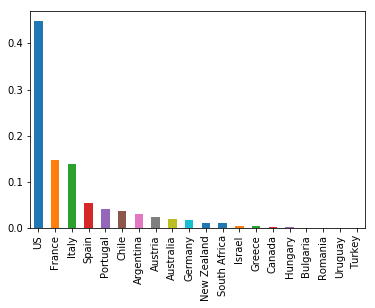

In [24]:
(data['country'].value_counts().head(20)/len(data)).plot.bar() 

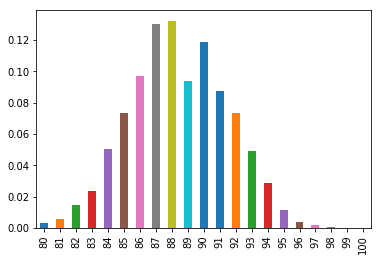

In [25]:
(data['points'].value_counts().sort_index()/len(data)).plot.bar()

In [43]:
data['title']

1             Quinta dos Avidagos 2011 Avidagos Red (Douro)
2             Rainstorm 2013 Pinot Gris (Willamette Valley)
3         St. Julian 2013 Reserve Late Harvest Riesling ...
4         Sweet Cheeks 2012 Vintner's Reserve Wild Child...
5         Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...
6          Terre di Giurfo 2013 Belsito Frappato (Vittoria)
7                     Trimbach 2012 Gewurztraminer (Alsace)
8         Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...
9         Jean-Baptiste Adam 2012 Les Natures Pinot Gris...
10        Kirkland Signature 2011 Mountain Cuvée Caberne...
11                  Leon Beyer 2012 Gewurztraminer (Alsace)
12        Louis M. Martini 2012 Cabernet Sauvignon (Alex...
14                 Mirassou 2012 Chardonnay (Central Coast)
15              Richard Böcking 2013 Devon Riesling (Mosel)
16               Felix Lavaque 2010 Felix Malbec (Cafayate)
17        Gaucho Andino 2011 Winemaker Selection Malbec ...
18        Pradorey 2010 Vendimia Selecci

In [60]:

def extract_title(title):
    n = len(title)
    
    ex_title1 = None
    ex_title2 = None
    ex_title3 = None
    ex_title4 = None
    ye=99999
    i = n-3
    while i in range(n):
        if (title[i]=='2')or(title[i]=='1')and(i+4<=n) :
            st = title[i:i+4]
            if st.isdigit():
                if (int(st)>1948)and(int(st)<2018):
                    ye = i
                    i = 99999
        i -= 1
    if ye != 99999:
        ex_title1 = title[:ye]
        ex_title2 = title[ye:ye+4]
        title = title[ye+4:]
    n = len(title)
    i = n-1
    brac=99999
    if title[i]==')':  
        while i in range(n):
            if title[i]=='(':
                brac = i
                i = 99999
            i -= 1
    if brac != 99999:
        ex_title3 = title[0:brac]
        ex_title4=title[brac+1:n-1]
    ex_title1 = ex_title1.strip() if ex_title1 != None else None
    ex_title2 = ex_title2.strip() if ex_title2 != None else None
    ex_title3 = ex_title3.strip() if ex_title3 != None else None
    ex_title4 = ex_title4.strip() if ex_title4 != None else None
    return ex_title1,ex_title2,ex_title3,ex_title4

In [62]:
extract_title(data['title'][1])

('Quinta dos Avidagos', '2011', 'Avidagos Red', 'Douro')

In [63]:
title_df = pd.DataFrame(np.asarray([extract_title(title) for title in data['title']]))

In [64]:
title_df.columns=['ex_title1','year','ex_title2','ex_title3']

In [65]:
title_df.head()

,ex_title1,year,ex_title2,ex_title3
0,Quinta dos Avidagos,2011,Avidagos Red,Douro
1,Rainstorm,2013,Pinot Gris,Willamette Valley
2,St. Julian,2013,Reserve Late Harvest Riesling,Lake Michigan Shore
3,Sweet Cheeks,2012,Vintner's Reserve Wild Child Block Pinot Noir,Willamette Valley
4,Tandem,2011,Ars In Vitro Tempranillo-Merlot,Navarra


In [66]:
missing_df = title_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
#missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
0,ex_title1,4159
1,year,4159
2,ex_title2,8582
3,ex_title3,8582


In [67]:
title_df['year'].value_counts()

2013    15191
2014    14890
2012    14742
2011    11437
2010    11104
2015     9641
2009     9055
2008     6724
2007     6497
2006     5170
2016     3548
2005     3292
2004     1604
2000      735
2001      668
1999      619
1998      541
2003      499
2002      333
1997      296
1996       64
1995       45
1994       23
1992       14
2017       11
1989        6
1988        5
1990        5
1973        4
1986        4
1991        4
1985        4
1979        3
1963        3
1993        3
1983        2
1978        2
1984        2
1955        2
1987        2
1964        2
1980        2
1952        2
1953        2
1951        2
1982        1
1965        1
1957        1
1976        1
1969        1
1974        1
1961        1
1968        1
1970        1
1966        1
1967        1
1975        1
Name: year, dtype: int64

In [69]:
title_df['year'] =  title_df['year'].apply(pd.to_numeric)

In [70]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120975 entries, 0 to 120974
Data columns (total 4 columns):
ex_title1    116816 non-null object
year         116816 non-null float64
ex_title2    112393 non-null object
ex_title3    112393 non-null object
dtypes: float64(1), object(3)
memory usage: 3.7+ MB


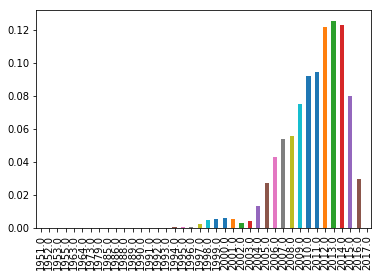

In [71]:
select_col= title_df['year']>1000
(title_df['year'][select_col].value_counts().head(40).sort_index()/len(title_df)).plot.bar()

In [37]:
title_df['ex_title1'].value_counts()

Testarossa                    217
Williams Selyem               211
DFJ Vinhos                    209
Wines & Winemakers            208
Chateau Ste. Michelle         193
Louis Latour                  173
Concha y Toro                 162
Columbia Crest                158
Kendall-Jackson               130
Siduri                        126
Gary Farrell                  125
Georges Duboeuf               120
Lynmar                        118
Montes                        117
Robert Mondavi                112
Santa Ema                     111
Trapiche                      111
Undurraga                     108
Fess Parker                   107
V. Sattui                     106
Foxen                         105
Iron Horse                    105
Maryhill                      102
Chehalem                      102
Kunde                         101
Dutton-Goldfield              100
Jean-Luc and Paul Aegerter    100
D'Arenberg                    100
Terre Rouge                   100
Chanson Père e

In [38]:
title_df['ex_title2'].value_counts()

Cabernet Sauvignon                                              3178
Chardonnay                                                      2907
Pinot Noir                                                      2798
Sauvignon Blanc                                                 1804
Merlot                                                          1154
Red                                                             1029
Rosé                                                             877
Syrah                                                            745
Riesling                                                         662
Zinfandel                                                        643
Pinot Grigio                                                     620
Riserva                                                          567
Pinot Gris                                                       565
Malbec                                                           547
Cabernet Franc                    

In [39]:
title_df[title_df['ex_title2']=='2005 Campo Lindo Gran Selección Old Wine Tempranillo-Cabernet Sauvignon']

,ex_title1,year,ex_title2,ex_title3
77893,Bodegas,1898.0,2005 Campo Lindo Gran Selección Old Wine Tempr...,Catalunya


In [40]:
title_df['ex_title3'].value_counts()

WA)                                     5253
Napa Valley                             4475
Russian River Valley                    3090
California                              2627
Paso Robles                             2327
Mendoza                                 2275
Willamette Valley                       1994
Alsace                                  1897
Finger Lakes                            1555
Sonoma Coast                            1467
Champagne                               1382
Rioja                                   1378
Sonoma County                           1245
Douro                                   1134
Barolo                                  1121
Toscana                                 1079
Mosel                                   1023
Carneros                                 999
Santa Barbara County                     994
Yakima Valley                            984
Sta. Rita Hills                          971
Dry Creek Valley                         936
Alentejano

In [41]:
need_fix=title_df[title_df['ex_title3']=='WA)'].index

for i in range(len(need_fix)):
    title_df.loc[need_fix[i],'ex_title3'] = title_df.loc[need_fix[i],'ex_title2'].split('(')[1]+'('+title_df.loc[need_fix[i],'ex_title3']
    title_df.loc[need_fix[i],'ex_title2'] = title_df.loc[need_fix[i],'ex_title2'].split('(')[0]

In [42]:
title_df['ex_title3'].value_counts()

Napa Valley                             4475
Columbia Valley(WA)                     4109
Russian River Valley                    3090
California                              2627
Paso Robles                             2327
Mendoza                                 2275
Willamette Valley                       1994
Alsace                                  1897
Finger Lakes                            1555
Sonoma Coast                            1467
Champagne                               1382
Rioja                                   1378
Sonoma County                           1245
Douro                                   1134
Barolo                                  1121
Toscana                                 1079
Walla Walla Valley(WA)                  1061
Mosel                                   1023
Carneros                                 999
Santa Barbara County                     994
Yakima Valley                            984
Sta. Rita Hills                          971
Dry Creek 